## Pneumonia Detection using CNN

#### What is Pneumonia disease?

1. Pneumonia is a type of lung infection that can be caused by bacteria, viruses, or fungi.
2. It occurs when the air sacs in the lungs become inflamed and fill with fluid.
3. Symptoms can include coughing, chest pain, fever, chills, and shortness of breath.
4. Pneumonia can be a serious illness, especially in older adults, young children, and people with weakened immune systems.
5. Treatment usually involves antibiotics or antiviral medications, and supportive care to help manage symptoms.
6. Prevention methods include vaccination against common bacterial and viral pathogens, good hand hygiene, and avoiding exposure to cigarette smoke and other irritants.

## 1. Importing libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

import os
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline

## 2. Loading Data

NORMAL


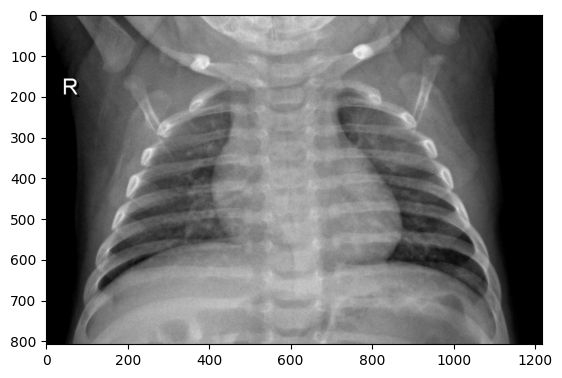

In [2]:
img_name = 'NORMAL2-IM-0588-0001.jpeg'
img_normal = load_img('chest_xray/train/NORMAL/' + img_name)

print('NORMAL')
plt.imshow(img_normal)
plt.show()

PNEUMONIA


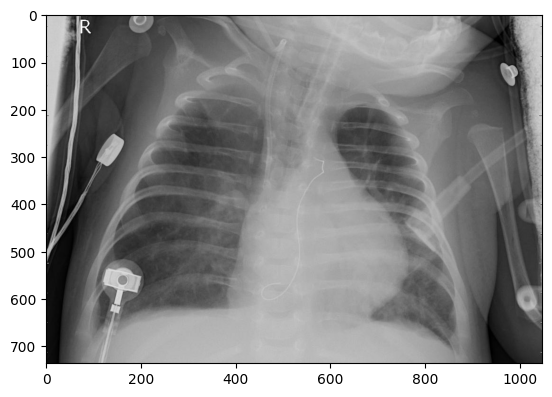

In [3]:
img_name = 'person63_bacteria_306.jpeg'
img_pneumonia = load_img('chest_xray/train/PNEUMONIA/' + img_name)

print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

In [4]:
# dimensions of our images.
img_width, img_height = 150, 150

## 3. Defining the Train, Test and Validation data

In [5]:
train_data_dir = 'chest_xray/train'
validation_data_dir = 'chest_xray/val'
test_data_dir = 'chest_xray/test'

nb_train_samples = 5217
nb_validation_samples = 17
epochs = 11
batch_size = 16

In [6]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

## 4. Building Sequential model

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

### Check information about model

In [8]:
model.layers

In [9]:
model.input

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'conv2d_input')>

In [10]:
model.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'activation_4')>

### Compiling the model 

`RMSprop` is a gradient descent optimization algorithm that uses a moving average of the squared gradient to adjust the learning rate and converge faster than traditional gradient descent.

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Upload Image

In [12]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [13]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [15]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [16]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


## Fit the Model

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/11
326/326 [==============================] - 97s 296ms/step - loss: 0.4627 - accuracy: 0.7951 - val_loss: 2.3746 - val_accuracy: 0.6250
Epoch 2/11
326/326 [==============================] - 96s 294ms/step - loss: 0.2933 - accuracy: 0.8735 - val_loss: 0.9821 - val_accuracy: 0.6250
Epoch 3/11
326/326 [==============================] - 97s 297ms/step - loss: 0.2439 - accuracy: 0.9015 - val_loss: 0.5871 - val_accuracy: 0.8125
Epoch 4/11
326/326 [==============================] - 119s 366ms/step - loss: 0.2289 - accuracy: 0.9145 - val_loss: 0.7149 - val_accuracy: 0.7500
Epoch 5/11
326/326 [==============================] - 116s 356ms/step - loss: 0.2200 - accuracy: 0.9206 - val_loss: 2.9090 - val_accuracy: 0.6250
Epoch 6/11
326/326 [==============================] - 121s 372ms/step - loss: 0.2010 - accuracy: 0.9287 - val_loss: 1.7734 - val_accuracy: 0.6250
Epoch 7/11
326/326 [==============================] - 125s 384ms/step - loss: 0.1804 - accuracy: 0.9316 - val_loss: 0.8021 - va

## Accuracy Achieved by Pneumonia Model is 94.33 %

In [ ]:
#model.save('pneumonia_model.h5')

In [21]:
# evaluate the model
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

C:\Users\Aniket\AppData\Local\Temp\ipykernel_11584\2998085925.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator)



accuracy: 87.82%
